In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacextoy-dataanalysis-launchprediction/SpaceX Metadata.docx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_correlation.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_contracts_customers_known_revenue.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/Fairing Null Handling Cleaning Adding Financial Columns.docx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_encoded.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_financials_raw.xlsx
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_extra_correlation.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex.csv
/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_financials.csv


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [90]:
df = pd.read_csv("/kaggle/input/spacextoy-dataanalysis-launchprediction/spacex_contracts_customers_known_revenue.csv")

In [91]:
df.head()

,FlightNumber,Date,Mission,RevenuePerLaunch,Customer,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,...,ReusedCore,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year,ReusedFairings
0,3,3/1/2013,CRS (original contract),133300000,NASA,Falcon 9,677,ISS,CCAFS SLC 40,None None,...,0,0,1,0,B0007,-80.577366,28.561857,0,2013,0
1,7,4/18/2014,CRS (original contract),133300000,NASA,Falcon 9,2296,ISS,CCAFS SLC 40,True Ocean,...,0,1,1,0,B1006,-80.577366,28.561857,1,2014,0
2,9,8/5/2014,AsiaSat 6,52200000,AsiaSat,Falcon 9,4535,GTO,CCAFS SLC 40,None None,...,0,0,1,0,B1008,-80.577366,28.561857,0,2014,0
3,10,9/7/2014,AsiaSat 8,52200000,AsiaSat,Falcon 9,4428,GTO,CCAFS SLC 40,None None,...,0,0,1,0,B1011,-80.577366,28.561857,0,2014,0
4,11,9/21/2014,CRS (original contract),133300000,NASA,Falcon 9,2216,ISS,CCAFS SLC 40,False Ocean,...,0,0,1,0,B1010,-80.577366,28.561857,0,2014,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FlightNumber      28 non-null     int64  
 1   Date              28 non-null     object 
 2   Mission           28 non-null     object 
 3   RevenuePerLaunch  28 non-null     int64  
 4   Customer          28 non-null     object 
 5   BoosterVersion    28 non-null     object 
 6   PayloadMass       28 non-null     int64  
 7   Orbit             28 non-null     object 
 8   LaunchSite        28 non-null     object 
 9   Outcome           28 non-null     object 
 10  Flights           28 non-null     int64  
 11  GridFins          28 non-null     int64  
 12  ReusedCore        28 non-null     int64  
 13  Legs              28 non-null     int64  
 14  Block             28 non-null     int64  
 15  ReusedCount       28 non-null     int64  
 16  Serial            28 non-null     object 
 17 

In [93]:
df.columns

Index(['FlightNumber', 'Date', 'Mission', 'RevenuePerLaunch', 'Customer',
       'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome',
       'Flights', 'GridFins', 'ReusedCore', 'Legs', 'Block', 'ReusedCount',
       'Serial', 'Longitude', 'Latitude', 'Class', 'Year', 'ReusedFairings'],
      dtype='object')

In [94]:
categorical = ['Mission','Customer', 'Orbit', 'LaunchSite', 'Outcome']
numeric = ['PayloadMass', 'Flights', 'GridFins', 'ReusedCore', 'Legs', 
           'Block', 'ReusedCount', 'Class', 'Year', 'ReusedFairings']
other = ['Date', 'FlightNumber','Serial', 'BoosterVersion']
target = ['RevenuePerLaunch']

df = df[categorical + numeric + target + other]

In [95]:
df.head()

,Mission,Customer,Orbit,LaunchSite,Outcome,PayloadMass,Flights,GridFins,ReusedCore,Legs,Block,ReusedCount,Class,Year,ReusedFairings,RevenuePerLaunch,Date,FlightNumber,Serial,BoosterVersion
0,CRS (original contract),NASA,ISS,CCAFS SLC 40,None None,677,1,0,0,0,1,0,0,2013,0,133300000,3/1/2013,3,B0007,Falcon 9
1,CRS (original contract),NASA,ISS,CCAFS SLC 40,True Ocean,2296,1,0,0,1,1,0,1,2014,0,133300000,4/18/2014,7,B1006,Falcon 9
2,AsiaSat 6,AsiaSat,GTO,CCAFS SLC 40,None None,4535,1,0,0,0,1,0,0,2014,0,52200000,8/5/2014,9,B1008,Falcon 9
3,AsiaSat 8,AsiaSat,GTO,CCAFS SLC 40,None None,4428,1,0,0,0,1,0,0,2014,0,52200000,9/7/2014,10,B1011,Falcon 9
4,CRS (original contract),NASA,ISS,CCAFS SLC 40,False Ocean,2216,1,0,0,0,1,0,0,2014,0,133300000,9/21/2014,11,B1010,Falcon 9


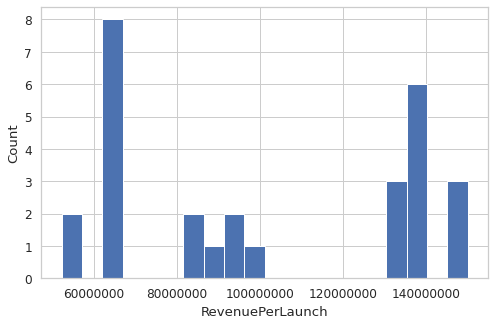

In [96]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(
    df['RevenuePerLaunch'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
            ).set(xlabel='RevenuePerLaunch', ylabel='Count');

In [97]:
df["RevenuePerLaunch"].describe().apply("{0:.5f}".format)

count           28.00000
mean     101641428.57143
std       36407745.99249
min       52200000.00000
25%       64720000.00000
50%       92600000.00000
75%      140000000.00000
max      150000000.00000
Name: RevenuePerLaunch, dtype: object

Revenue per launch is not normally distributed

Of the 28 launches in the dataset:
* mean revenue per launch: 101,641,428.57
* median revenue per launch: 92,600,000.00
* range: 52,200,000.00 to 150,000,000.00

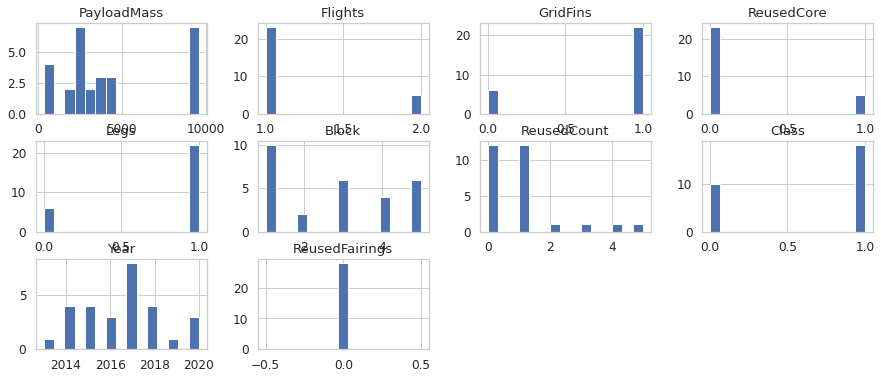

In [98]:
df[numeric].hist(bins=15, figsize=(15, 6), layout=(3, 4));

Payload mass and Revenue per launch seem to have a similar distribution

No Revenue per launch data on Reused fairings

More Revenue per launch data on new cores vs Reused cores

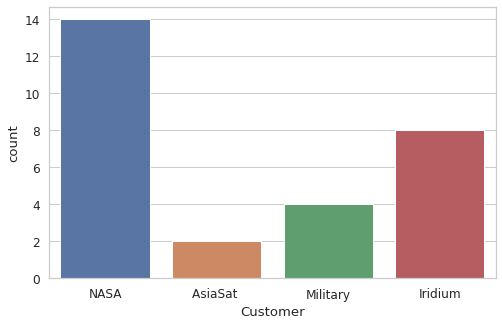

In [99]:
sns.countplot(df['Customer']);

Top private sector customer in the dataset is Iridium 

Top public sector customer in the dataset is NASA

In [100]:
df[categorical].head()

,Mission,Customer,Orbit,LaunchSite,Outcome
0,CRS (original contract),NASA,ISS,CCAFS SLC 40,None None
1,CRS (original contract),NASA,ISS,CCAFS SLC 40,True Ocean
2,AsiaSat 6,AsiaSat,GTO,CCAFS SLC 40,None None
3,AsiaSat 8,AsiaSat,GTO,CCAFS SLC 40,None None
4,CRS (original contract),NASA,ISS,CCAFS SLC 40,False Ocean


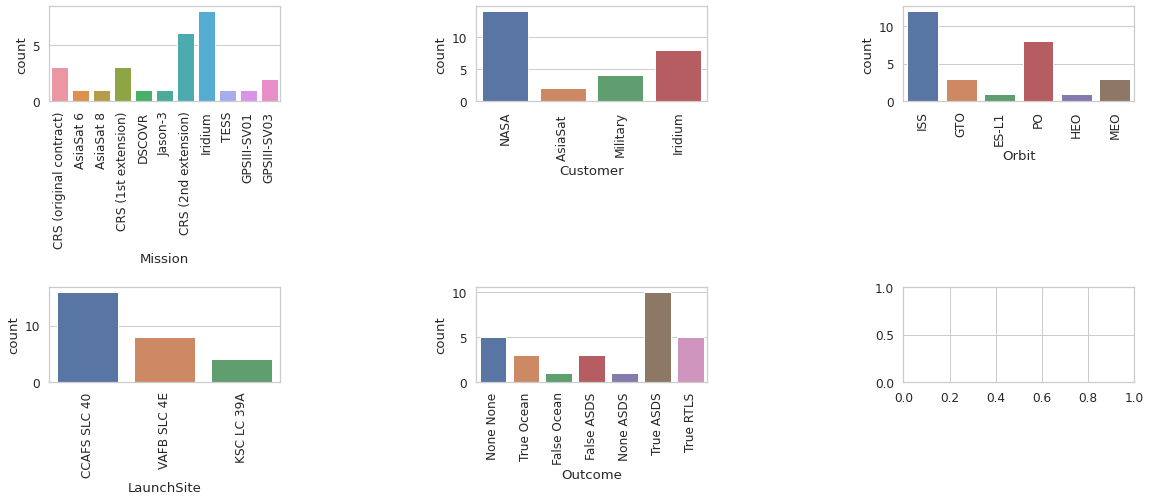

In [111]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.tight_layout(pad=12.0)
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Most missions in the dataset are CRS, which is a NASA contract, followed by the Iridium contract

Most missions are to Orbit ISS, International Space Station, this is NASA and = LEO orbit

About 2/3rds of the missions land successfully

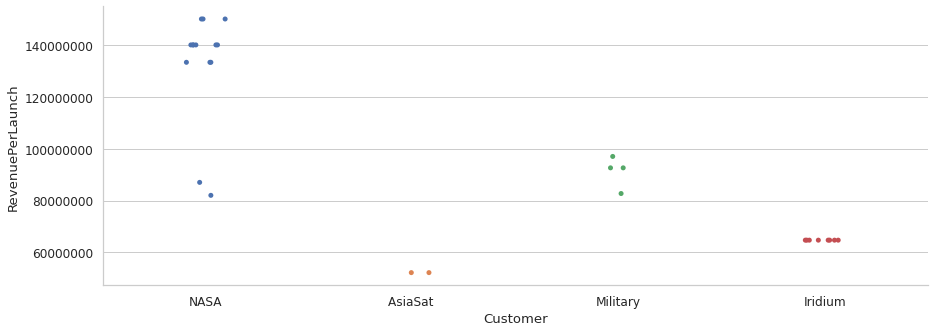

In [138]:
sns.catplot(y = 'RevenuePerLaunch', x = 'Customer', hue = 'Customer', data=df, height=5, aspect=2.5)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

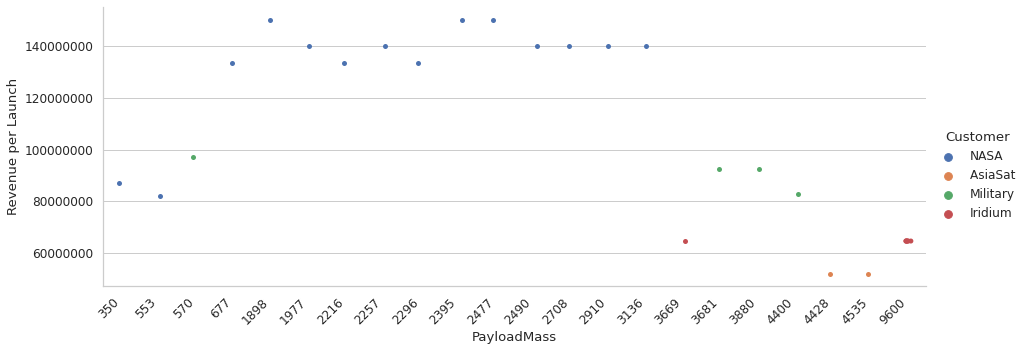

In [148]:
sns.catplot(y = 'RevenuePerLaunch', x = 'PayloadMass', hue = 'Customer', data=df, height=5, aspect=2.5)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Revenue per Launch')
plt.xticks(rotation=45, ha='right')
plt.show()

* There seems to be a quadratic relationship between payload mass and revenue per launch
* There does not seem to be a linear relationship
* Either possibility may be dependent upon customer type, as most contract data is for NASA (and Military in Orange) the exact nature of the relationship cannot be determined

In [121]:
new_core = 30000000
new_second = 10000000
new_fairings = 6000000
reuse_core = 250000
fuel_other = 4000000
new_cost = new_core + new_second + new_fairings + fuel_other
reuse_cost = reuse_core + new_second + new_fairings + fuel_other

In [124]:
df['RevenueMinus'] = df['ReusedCore'].where(df['ReusedCore'] == 0, (df['RevenuePerLaunch'] - new_cost))
df['RevenueMinus'] = df['ReusedCore'].where(df['ReusedCore'] == 1, (df['RevenuePerLaunch'] - reuse_cost))
df['RevenueOther'] = df.RevenuePerLaunch - df.RevenueMinus
df['RevenueOtherPerKg'] = df.RevenueOther/df.PayloadMass

In [146]:
df['PayloadMass'].describe()

count      28.000000
mean     4310.821429
std      3300.372359
min       350.000000
25%      2246.750000
50%      3023.000000
75%      5801.250000
max      9600.000000
Name: PayloadMass, dtype: float64

In [125]:
df['RevenueMinus'].describe().apply("{0:.5f}".format)

count           28.00000
mean      70761785.89286
std       46676237.71022
min              1.00000
25%       41340000.00000
50%       69550000.00000
75%      119750000.00000
max      129750000.00000
Name: RevenueMinus, dtype: object

In [126]:
df['RevenueOther'].describe().apply("{0:.5f}".format)

count           28.00000
mean      30879642.67857
std       26587859.25071
min       20250000.00000
25%       20250000.00000
50%       20250000.00000
75%       20250000.00000
max      139999999.00000
Name: RevenueOther, dtype: object

In [127]:
df['RevenueOtherPerKg'].describe().apply("{0:.5f}".format)

count       28.00000
mean     13737.37687
std      17069.32554
min       2109.37500
25%       5064.87231
50%       7218.30316
75%       9520.84633
max      70814.36469
Name: RevenueOtherPerKg, dtype: object

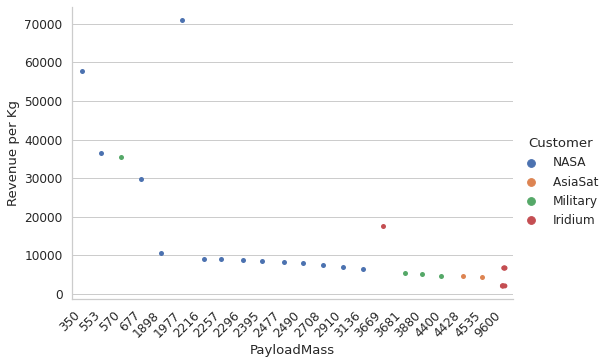

In [135]:
sns.catplot(y = 'RevenueOtherPerKg', x = 'PayloadMass', hue = 'Customer', data=df, height=5, aspect=1.5)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Revenue per Kg')
plt.xticks(rotation=45, ha='right')
plt.show()

As estimated 10,000 per kg (or 0.01 million per kg) seems appropriate to calculate SpaceX charge/revenue per kg in addition to the following costs:
* new_core = 30000000 or reuse_core = 250000
* new_second = 10000000 for all
* new_fairings = 6000000 or reuse_fairings = 750000
* fuel_other = 4000000 for all

In [139]:
AverageCost = (new_cost + reuse_cost)/2
AverageCost

35125000.0

In [141]:
df['RevenuePerLaunch'].describe().apply("{0:.5f}".format)

count           28.00000
mean     101641428.57143
std       36407745.99249
min       52200000.00000
25%       64720000.00000
50%       92600000.00000
75%      140000000.00000
max      150000000.00000
Name: RevenuePerLaunch, dtype: object

In [142]:
AverageRevenue = 101641428.57

In [149]:
AllocationPattern = df['RevenueOther'].mean()/AverageRevenue
AllocationPattern

0.30380960906413035

An allocation to revenue estimate of 30%, and 70% to cost seems appropriate